In [180]:
#!pip3 install snscrape
#!pip3 install emoji --upgrade

<h1>a) Obtención y preprocesamiento de texto

Nota: Para cargar los csv directamente, hay que ejecutar solamente la ultima celda del apartado a

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re

In [4]:
# Definimos los arrays donde se guardarán los datos
tweets = []
tweets_dates = []
tweets_users = []
tweets_rts = []

# Recorremos los twits y añadimos la información a los arrays
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#SOSMarMenor').get_items()):
    tweets.append([tweet.content])
    tweets_dates.append([tweet.date])
    tweets_users.append([tweet.user.username])
    tweets_rts.append([tweet.retweetCount])
    
# Creamos los df de los datos
tweets_df       = pd.DataFrame(tweets, columns=['Text'])
tweets_dates_df = pd.DataFrame(tweets_dates, columns=['Date'])
tweets_users_df = pd.DataFrame(tweets_users, columns=['User'])
tweets_rts_df = pd.DataFrame(tweets_rts, columns=['Rt'])

In [5]:
tweets_df

,Text
0,"Haciendo el ridículo, como siempre.. A ésto se..."
1,"""El #MarMenor se nos va de las manos y yo ento..."
2,"Aquí, repartiendo carnés de “buen español”…\n\..."
3,¿Se pensaban algunos que la situación de aband...
4,@violetay87 @SuperRatonCt @Mariloliana Un plan...
...,...
65862,Seguid destruyendo el Mar Menor y luego quejar...
65863,ANSE advierte a Valcárcel de que 'pagará el da...
65864,El Mar Menor podría ser un destino de primer n...
65865,Murcia podría haber sido un paraíso turístico ...


In [6]:
import emoji, string

tweets_df = tweets_df.replace(r'\n',' ', regex=True) # Elimina los saltos de línea
tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('(http[s]:\/\/.*)', '')) # Elimina links
tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('[?!¿¡.,;:\-\_\/\\*+€\"·$%&()=]', '')) # Elimina símbolos de puntuación
tweets_df['Text'] = tweets_df.Text.astype(str).apply(lambda x: emoji.get_emoji_regexp().sub(u'', x)) # Elimina emojis
tweets_df = tweets_df[tweets_df.Text != ''] # Elimina las filas que no contengan ningún contenido

<ipython-input-6-373e5067d611>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('(http[s]:\/\/.*)', '')) # Elimina links
<ipython-input-6-373e5067d611>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('[?!¿¡.,;:\-\_\/\\*+€\"·$%&()=]', '')) # Elimina símbolos de puntuación


In [10]:
tweets_with_hs_and_users = tweets_df.copy()

In [11]:
tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('([@#]\w+.*?)', '')) # Elimina los hashtags y los usuarios
tweets_df['Text'] = tweets_df.Text.str.strip()
tweets_df['Text'] = tweets_df.Text.dropna()

<ipython-input-11-cc3032749819>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df = tweets_df.astype(str).apply(lambda x: x.str.replace('([@#]\w+.*?)', '')) # Elimina los hashtags y los usuarios


In [12]:
tweets_without_hs_and_users = tweets_df.copy()

In [13]:
# Unimos los tweets con el df que contenía las fechas de los tweets
tweets_with_hs_and_users = pd.concat([tweets_with_hs_and_users, tweets_rts_df, tweets_dates_df, tweets_users_df], axis=1)
tweets_without_hs_and_users = pd.concat([tweets_without_hs_and_users, tweets_rts_df, tweets_dates_df, tweets_users_df], axis=1)

In [14]:
# Guarda los twits en csv
from pathlib import Path

filepath1 = Path('csv/tweets_with_hs_and_users.csv')
filepath2 = Path('csv/tweets_without_hs_and_users.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
filepath2.parent.mkdir(parents=True, exist_ok=True)

tweets_with_hs_and_users.to_csv(filepath1)
tweets_without_hs_and_users.to_csv(filepath2)

In [ ]:
# Cargar twits desde ficheros en local (csv)
from pathlib import Path

tweets_with_hs_and_users = pd.read_csv('csv/tweets_with_hs_and_users.csv')
tweets_without_hs_and_users = pd.read_csv('csv/tweets_without_hs_and_users.csv')
tweets_with_hs_and_users['Date'] = pd.to_datetime(tweets_with_hs_and_users['Date'])
tweets_without_hs_and_users['Date'] = pd.to_datetime(tweets_without_hs_and_users['Date'])
tweets_with_hs_and_users.drop(inplace=True, columns=['Unnamed: 0'])
tweets_without_hs_and_users.drop(inplace=True, columns=['Unnamed: 0'])
tweets_with_hs_and_users.dropna(inplace=True)
tweets_without_hs_and_users.dropna(inplace=True)

<h1>b) Exploración de datos

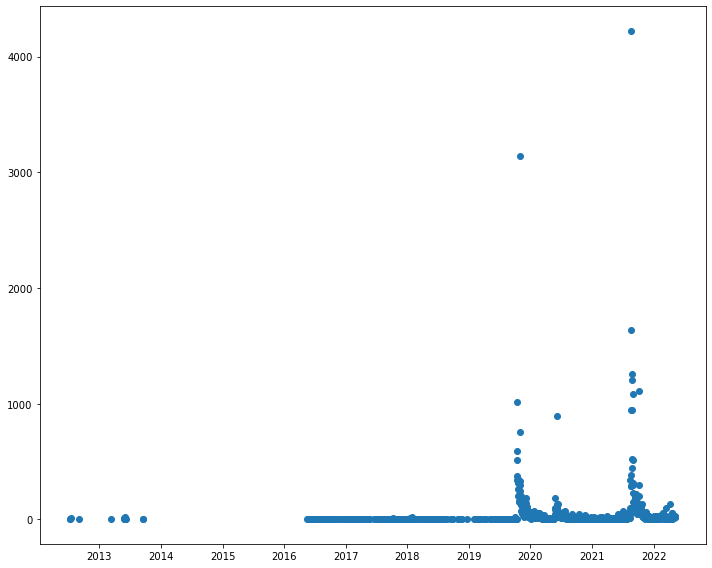

La fecha en la que se publicaron mas twits es: 2021-08-21


In [182]:
# ¿En qué períodos ha existido más actividad en relación al hashtag #SOSMarMenor?, ¿qué ocurrió en esos momentos?

# Según la grafica generada, se puede observar que el dia donde mas twits hubo fue el 21 de agosto de 2021.
# Las epocas con mayor publicacion de twits se diferencian de Mayo a Junio de 2020, que hubo una acumulación de algas que llegaban a podrirse, y de Agosto a Octubre de 2021, que ocurrió un descenso de oxigeno en ciertas partes de la laguna debido al vertidos agrarios

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
# import numpy as np

dates = tweets_with_hs_and_users['Date'].dt.date.values

uniqueDates = sorted(set(dates), reverse=True)
ocurr = Counter(dates)

figure(figsize=(10, 8))
plt.plot_date(list(uniqueDates), list(ocurr.values()))
plt.tight_layout()
plt.show()

print('La fecha en la que se publicaron mas twits es:', list(ocurr.keys())[list(ocurr.values()).index(max(ocurr.values()))])

In [87]:
# ¿Cuántos usuarios han generado tuits en relación al hashtag #SOSMarMenor?

print('Cantidad de usuarios que han generado tuits en relación al hashtag:', len(tweets_with_hs_and_users['User'].unique()))

Cantidad de usuarios que han generado tuits en relación al hashtag: 9010


In [88]:
# ¿Cuáles son los usuarios más activos?, ¿son partidos políticos, ONGs o plataformas ciudadanas, o personas particulares?
# Los perfiles que mas twits publican suelen ser cuentas enfocadas en el mar menor, probablemente usuarios de alguna ong relacionada, junto a personas particulares

tweets_with_hs_and_users['User'].value_counts().head(20)

KlimoMur           1049
Mariloliana         766
Miguel_Egea         716
YanFickerRuiz       655
SiemprefuenT        611
sosmarmenorofi      541
ono_murcia          519
MariaLucha60        516
fonsipoder          439
jaortegagarcia      429
NuestroMarMenor     420
EcoenAccionRM       406
MenorSos            376
Strikebis           363
encar240            352
Kaquele             350
FAVCAC1             345
antonioh2003        326
MurciaIndignado     307
salva_psoemanga     290
Name: User, dtype: int64

In [89]:
# ¿Cuáles han sido los tuits más celebrados (i.e. retuiteados)?, ¿qué tipo de mensajes transmiten (de protesta, de indignación, de ánimo, de solidaridad)?

# Principalmente, son twits criticando al gobierno y los partidos politicos por la situación

for i in range(5):
    print(i+1,'-',tweets_with_hs_and_users.sort_values(by=['Rt'], ascending=False)['Text'][i])

1 - Haciendo el ridículo como siempre A ésto se dedica el  y así le va a esta Región con la derecha al frente
2 - El  se nos va de las manos y yo entonaré mi 'mea culpa' como debieran hacerlo el PSOE y el PP
3 - Aquí repartiendo carnés de “buen español”…
4 - Se pensaban algunos que la situación de abandono y degradación que sufre el Mar Menor y de la que se ha estado advirtiendo desde hace años no tendría un grave impacto en la actividad económica El daño que se le hace al  siempre es como un búmeran
5 - Un plantón por


<h1>c) Modelo lingüístico de identificación de temas

In [ ]:
# !pip3 install matplotlib
# !pip3 install pandas
# %conda install -c conda-forge wordcloud

In [90]:
# Filtramos los twits por las fechas de las dos epocas mencionadas en el apartado anterior
wc1 = tweets_with_hs_and_users.loc[
                    (tweets_with_hs_and_users['Date'] >= '2020-05-01')
                    & (tweets_with_hs_and_users['Date'] < '2020-06-01')
                    ]

wc2 = tweets_with_hs_and_users.loc[
                    (tweets_with_hs_and_users['Date'] >= '2021-08-01')
                    & (tweets_with_hs_and_users['Date'] < '2021-10-01')
                    ]

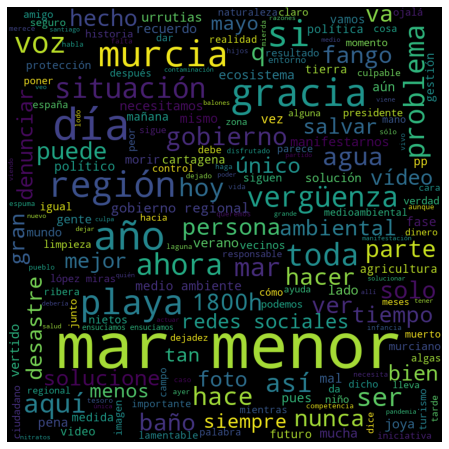

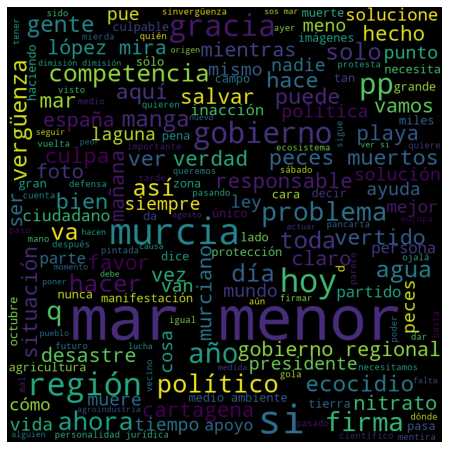

In [103]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Devuelve la lista de palabras de un conjunto de strings
def getCommentWords(list):
    comment_words = ''
    for val in list:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "

    return comment_words

# nltk.download('stopwords')

stopwords = set(stopwords.words('spanish'))
 
comment_words = getCommentWords(wc1['Text'])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

comment_words = getCommentWords(wc2['Text'])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [ ]:
# !pip3 install --upgrade gensim

In [145]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import ToktokTokenizer
%matplotlib inline

def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto))
    # Eliminado las palabras que tengo un solo caracter
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto

tokenizer = ToktokTokenizer() 

diccionario = Dictionary(tweets_with_hs_and_users['Text'].apply(limpiar_texto).apply(tokenizer.tokenize))
print(f'Número de tokens sin filtrar: {len(diccionario)}')

Número de tokens sin filtrar: 42226


In [146]:
diccionario.filter_extremes(no_below=3, no_above = 2)
print(f'Número de tokens con los tokens filtrados: {len(diccionario)}')

Número de tokens con los tokens filtrados: 14812


In [147]:
# Creamos el corpus 
corpus = [diccionario.doc2bow(twit) for twit in tweets_with_hs_and_users['Text'].apply(limpiar_texto).apply(tokenizer.tokenize)]

In [148]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=50, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

In [180]:
topicos = lda.print_topics(num_words=10, num_topics=50)
for topico in topicos:
    print(topico)

(0, '0.230*"y" + 0.189*"muy" + 0.097*"menos" + 0.074*"partido" + 0.059*"estas" + 0.046*"él" + 0.029*"viendo" + 0.028*"dentro" + 0.028*"responsable" + 0.027*"verano"')
(1, '0.238*"pero" + 0.128*"ver" + 0.085*"gente" + 0.080*"bien" + 0.062*"hecho" + 0.054*"cómo" + 0.035*"ir" + 0.027*"trabajo" + 0.026*"nada" + 0.023*"usted"')
(2, '0.229*"murcia" + 0.173*"región" + 0.120*"tiene" + 0.069*"culpa" + 0.053*"ellos" + 0.037*"nosotros" + 0.027*"dinero" + 0.024*"sino" + 0.020*"competencias" + 0.019*"ustedes"')
(3, '0.232*"hacer" + 0.118*"vida" + 0.097*"unos" + 0.074*"otros" + 0.041*"país" + 0.033*"tus" + 0.031*"vivo" + 0.030*"sabemos" + 0.026*"real" + 0.023*"tomen"')
(4, '0.098*"nuestros" + 0.078*"protección" + 0.064*"ecosistema" + 0.063*"ambiental" + 0.057*"recuperación" + 0.051*"poner" + 0.049*"basta" + 0.038*"vía" + 0.033*"ejemplo" + 0.027*"actual"')
(5, '0.218*"ser" + 0.078*"debe" + 0.070*"mundo" + 0.065*"ese" + 0.048*"madrid" + 0.046*"acción" + 0.032*"unas" + 0.031*"ecologistas" + 0.027*"fina

In [179]:
selected_topics = []
# El tópico 2 podría hacer referencia a que algun colectivo (probablemente político) tiene la culpa de algo (tal vez un problema económico) en la región de murcia.
# Esta afirmación es defendible debido a que en el wordcloud aparece el apellido del político Pedro Sánchez, y aparece la palabra dinero
selected_topics.append(topicos[2])
# El tópico 17 aparece la palabra desastre, junto a las de agricultura y intensiva. Esto hace referencia a los vertidos agricolas sobre el Mar Menor, que provocaron la contaminación del mismo
# El tópico 26 también parece tener el mismo tema que el 17, ya que sale la palabra vertidos, junto a la palabra aguas
selected_topics.append(topicos[17])
selected_topics.append(topicos[26])
# El tópico 33 aparecen las palabras peces y muertos, haciendo referencia a la aparición de peces muertos en el tercer quatrimestre de 2021. También hablan sobre la necesidad de alguna gestión o acciones para remediarlo
selected_topics.append(topicos[33])
# El tópico 36 hace referencia a que se avecinaba una DANA (gota fría) y esto provocaría el arrastre de elementos contaminantes al Mar Menor.
# Esto se puede defender debido a que aparecen las palabras dana, orilla, contaminación y matado
selected_topics.append(topicos[36])
# El tópico 41 aparecen las palabras peces y muertos, haciendo referencia a la aparición de peces muertos en el tercer quatrimestre de 2021. También hablan sobre la necesidad de alguna gestión o acciones para remediarlo
selected_topics.append(topicos[41])

for topic in selected_topics:
    print(f'TÓPICO {topic[0]}:',topic[1])

TÓPICO 2: 0.229*"murcia" + 0.173*"región" + 0.120*"tiene" + 0.069*"culpa" + 0.053*"ellos" + 0.037*"nosotros" + 0.027*"dinero" + 0.024*"sino" + 0.020*"competencias" + 0.019*"ustedes"
TÓPICO 17: 0.166*"políticos" + 0.164*"desastre" + 0.094*"agricultura" + 0.064*"murcianos" + 0.063*"donde" + 0.043*"quién" + 0.038*"intensiva" + 0.033*"mucha" + 0.032*"comunidad" + 0.032*"ahí"
TÓPICO 26: 0.172*"estamos" + 0.135*"vertidos" + 0.072*"aguas" + 0.065*"habéis" + 0.046*"patrimonio" + 0.042*"alcázares" + 0.041*"hablar" + 0.041*"mira" + 0.038*"urgente" + 0.034*"mismos"
TÓPICO 33: 0.214*"30" + 0.096*"dana" + 0.031*"orilla" + 0.031*"contaminación" + 0.028*"llevan" + 0.028*"pide" + 0.027*"matado" + 0.022*"buen" + 0.021*"veces" + 0.018*"hilo"
TÓPICO 36: 0.445*"ha" + 0.133*"pp" + 0.032*"realidad" + 0.030*"últimos" + 0.025*"puedo" + 0.022*"regadío" + 0.022*"caballitos" + 0.020*"tenido" + 0.017*"ido" + 0.015*"salvarlo"
TÓPICO 41: 0.229*"sos" + 0.170*"peces" + 0.074*"muertos" + 0.069*"necesitamos" + 0.059*"g

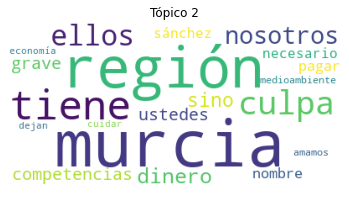

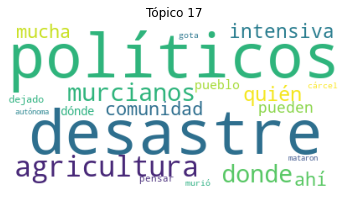

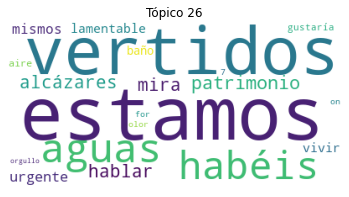

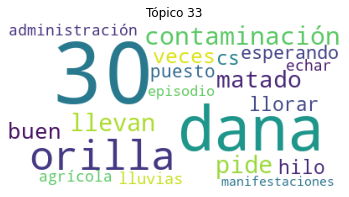

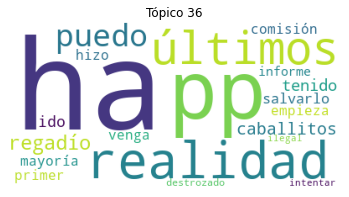

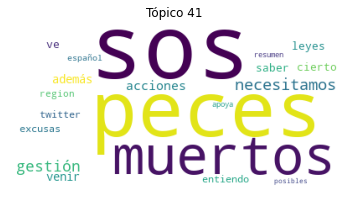

In [181]:
for i in [2,17,26,33,36,41]:
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0)
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()